# Problem Statement :-
## The goal of this project is to analyze agricultural commodity price data from various markets across India to uncover patterns, trends, and insights that can aid farmers, traders, and policymakers in making informed decisions.

# Objectives are :-
#### 1) To identify the variation in commodity prices (minimum, maximum, and modal) across different states, districts, and markets.

#### 2) To explore the relationship between commodity types, varieties, grades, and their prices.

#### 3) To detect seasonal or regional trends in agricultural commodity prices.

#### 4) To predict price ranges for key commodities based on historical data and market characteristics.

#### 5) To provide actionable insights, such as identifying high-value commodities or markets with significant price volatility.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import skew, kurtosis
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Importing Data From a CSV File Using Pandas read_csv function

In [3]:
#Assing a variable name as a for data
a = pd.read_csv("Data Set.csv")
#Printing Data
a

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Tirupati,Banana,Bhushavali(Pacha),Small,16/04/2025,7500,10000,8500
1,Andhra Pradesh,Guntur,Pidugurala(Palnadu),Dry Chillies,1st Sort,FAQ,16/04/2025,7500,11500,11000
2,Bihar,Bhojpur,Aarah,Potato,Jyoti,FAQ,16/04/2025,1500,1700,1600
3,Gujarat,Amreli,Damnagar,Green Chilli,Green Chilly,FAQ,16/04/2025,1650,2550,2000
4,Gujarat,Amreli,Damnagar,Guar,Gwar,FAQ,16/04/2025,2000,3050,2550
...,...,...,...,...,...,...,...,...,...,...
2154,West Bengal,Hooghly,Sheoraphuly,Green Chilli,Other,FAQ,16/04/2025,3600,4000,3800
2155,West Bengal,Hooghly,Sheoraphuly,Onion,Nasik,FAQ,16/04/2025,2000,2200,2100
2156,West Bengal,Hooghly,Sheoraphuly,Pointed gourd (Parval),Pointed gourd (Parval),FAQ,16/04/2025,3400,3800,3600
2157,West Bengal,Medinipur(W),Ghatal,Cucumbar(Kheera),Cucumbar,FAQ,16/04/2025,3700,3900,3800


#### Some Basic Opertions

a.head() #Used to genrate first 5 rows

In [4]:
a.tail() # Used to genrate last  5 rows

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
2154,West Bengal,Hooghly,Sheoraphuly,Green Chilli,Other,FAQ,16/04/2025,3600,4000,3800
2155,West Bengal,Hooghly,Sheoraphuly,Onion,Nasik,FAQ,16/04/2025,2000,2200,2100
2156,West Bengal,Hooghly,Sheoraphuly,Pointed gourd (Parval),Pointed gourd (Parval),FAQ,16/04/2025,3400,3800,3600
2157,West Bengal,Medinipur(W),Ghatal,Cucumbar(Kheera),Cucumbar,FAQ,16/04/2025,3700,3900,3800
2158,West Bengal,Medinipur(W),Ghatal,Sweet Pumpkin,Other,FAQ,16/04/2025,1350,1450,1400


In [5]:
#To genrate any random rows instead of 1st values or last values
a.sample(7) 

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
136,Kerala,Kozhikode(Calicut),Palayam,Bottle gourd,Other,FAQ,16/04/2025,1500,1500,1500
878,Kerala,Alappuzha,Harippad,Amaranthus,Other,FAQ,16/04/2025,5000,5500,5000
1048,Odisha,Balasore,Jaleswar,Pumpkin,Other,FAQ,16/04/2025,500,900,700
449,Himachal Pradesh,Kangra,Palampur,Mango,Safeda,Medium,16/04/2025,10000,11000,10500
461,Karnataka,Shimoga,Shimoga,Brinjal,Brinjal,FAQ,16/04/2025,800,1000,900
1099,Punjab,Gurdaspur,Gurdaspur,Grapes,Other,Medium,16/04/2025,5000,5500,5200
1246,Gujarat,Bharuch,Jambusar,Castor Seed,Other,FAQ,16/04/2025,4400,5200,4800


In [6]:
#To know how many rows and columns
a.shape

(2159, 10)

In [7]:
# Used to display column names
a.columns 

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price',
       'Modal_x0020_Price'],
      dtype='object')

In [8]:
#To display  index dtype, columns, non-null values, and memory usage ....etc
a.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              2159 non-null   object
 1   District           2159 non-null   object
 2   Market             2159 non-null   object
 3   Commodity          2159 non-null   object
 4   Variety            2159 non-null   object
 5   Grade              2159 non-null   object
 6   Arrival_Date       2159 non-null   object
 7   Min_x0020_Price    2159 non-null   int64 
 8   Max_x0020_Price    2159 non-null   int64 
 9   Modal_x0020_Price  2159 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 168.8+ KB


# Data Cleaning 
#### 1) Remove Duplicates
#### 2) Handling Missing Values
#### 3) Checking for correct Data Types
#### 4) Handling Outlers

# Step - 1 :  Checking for Duplicaates

In [9]:
duplicate_values = a.duplicated() #Used to display duplicate values
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
2154    False
2155    False
2156    False
2157    False
2158    False
Length: 2159, dtype: bool


In [10]:
duplicate_values_count = a.duplicated().sum() #Used to display count of duplicate vlaues
print(duplicate_values_count)

0


##### As their is no duplicates so no need to use drop duplicates function we can go for next step

In [11]:
a.drop_duplicates() #Used to remove duplicates from the dataset

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Tirupati,Banana,Bhushavali(Pacha),Small,16/04/2025,7500,10000,8500
1,Andhra Pradesh,Guntur,Pidugurala(Palnadu),Dry Chillies,1st Sort,FAQ,16/04/2025,7500,11500,11000
2,Bihar,Bhojpur,Aarah,Potato,Jyoti,FAQ,16/04/2025,1500,1700,1600
3,Gujarat,Amreli,Damnagar,Green Chilli,Green Chilly,FAQ,16/04/2025,1650,2550,2000
4,Gujarat,Amreli,Damnagar,Guar,Gwar,FAQ,16/04/2025,2000,3050,2550
...,...,...,...,...,...,...,...,...,...,...
2154,West Bengal,Hooghly,Sheoraphuly,Green Chilli,Other,FAQ,16/04/2025,3600,4000,3800
2155,West Bengal,Hooghly,Sheoraphuly,Onion,Nasik,FAQ,16/04/2025,2000,2200,2100
2156,West Bengal,Hooghly,Sheoraphuly,Pointed gourd (Parval),Pointed gourd (Parval),FAQ,16/04/2025,3400,3800,3600
2157,West Bengal,Medinipur(W),Ghatal,Cucumbar(Kheera),Cucumbar,FAQ,16/04/2025,3700,3900,3800


In [12]:
a.drop('Arrival_Date', axis=1, inplace=True) #No use of it
print(a.columns.tolist())

['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']


## Step - 2 : Handling Missing Values

In [13]:
null_values = a.isnull() #Used to display null values
print(null_values)

      State  District  Market  Commodity  Variety  Grade  Min_x0020_Price  \
0     False     False   False      False    False  False            False   
1     False     False   False      False    False  False            False   
2     False     False   False      False    False  False            False   
3     False     False   False      False    False  False            False   
4     False     False   False      False    False  False            False   
...     ...       ...     ...        ...      ...    ...              ...   
2154  False     False   False      False    False  False            False   
2155  False     False   False      False    False  False            False   
2156  False     False   False      False    False  False            False   
2157  False     False   False      False    False  False            False   
2158  False     False   False      False    False  False            False   

      Max_x0020_Price  Modal_x0020_Price  
0               False           

In [14]:
missing_values_count = a.isnull().sum() #Used to display any missing values and count of it
print(missing_values_count)

State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64


# Step - 3 : Checking for incorrect Data Types

In [15]:
a['Commodity'] = a['Commodity'].replace({
    'Green Chilly': 'Green Chilli',
    'Bitter Gourd': 'Bitter gourd'
})

In [16]:
print(a.dtypes)
# Convert prices to numeric
a['Min_x0020_Price'] = pd.to_numeric(a['Min_x0020_Price'], errors='coerce')
a['Max_x0020_Price'] = pd.to_numeric(a['Max_x0020_Price'], errors='coerce')
a['Modal_x0020_Price'] = pd.to_numeric(a['Modal_x0020_Price'], errors='coerce')

State                object
District             object
Market               object
Commodity            object
Variety              object
Grade                object
Min_x0020_Price       int64
Max_x0020_Price       int64
Modal_x0020_Price     int64
dtype: object


# Step - 4 : Handling Outlers

#### Here I am using IQR Method

<Axes: ylabel='Modal_x0020_Price'>

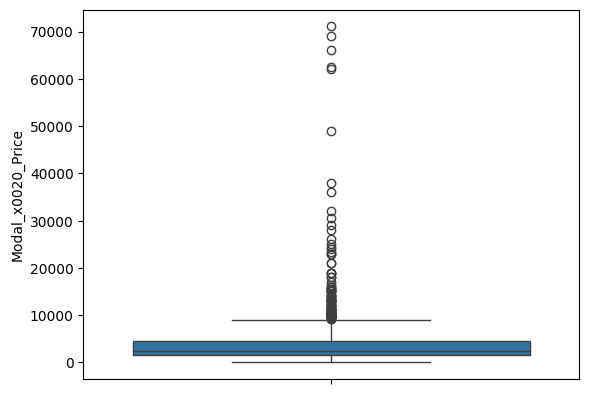

In [17]:
sns.boxplot(a['Modal_x0020_Price'])

In [18]:
q1 = a['Modal_x0020_Price'].quantile(0.25)
q3 = a['Modal_x0020_Price'].quantile(0.75)
iqr = q3 - q1
print(q1,q3,iqr)

1500.0 4500.0 3000.0


In [19]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

9000.0
-3000.0


In [20]:
new_a = a.loc[(a['Modal_x0020_Price'] <= upper_limit) & (a['Modal_x0020_Price'] >= lower_limit)]
print(len(new_a))

2061


<Axes: ylabel='Modal_x0020_Price'>

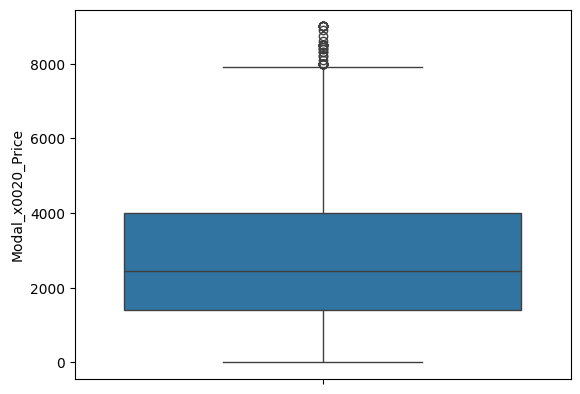

In [21]:
sns.boxplot(new_a['Modal_x0020_Price'])

# Data Visualization
#### Visualization 1: Top 10 commodities by average modal price
#### Visualization 2: Price Distribution by State
#### Visualization 3: Price range (min, max, modal) for top states
#### Visualization 4: Commodity Distribution by State
#### Visualization 5: Min vs. Max Price by Commodity
#### Visualization 6: Modal Price Distribution

# Visualization 1: Top 10 commodities by average modal price

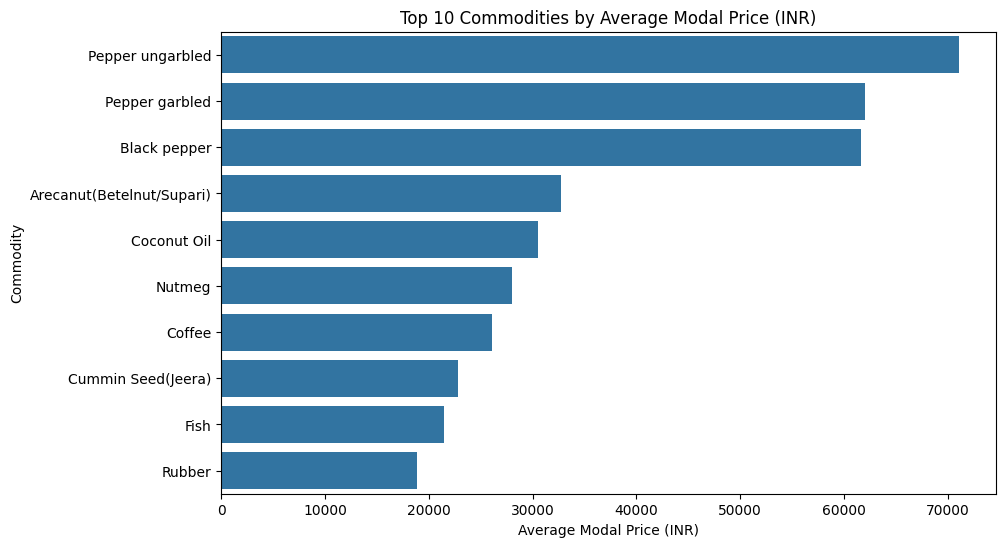

In [22]:
#Bar Plot
top_commodities = a.groupby('Commodity')['Modal_x0020_Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_commodities.values, y=top_commodities.index)
plt.title('Top 10 Commodities by Average Modal Price (INR)')
plt.xlabel('Average Modal Price (INR)')
plt.ylabel('Commodity')
plt.show()

# Visualization 2: Price Distribution by State

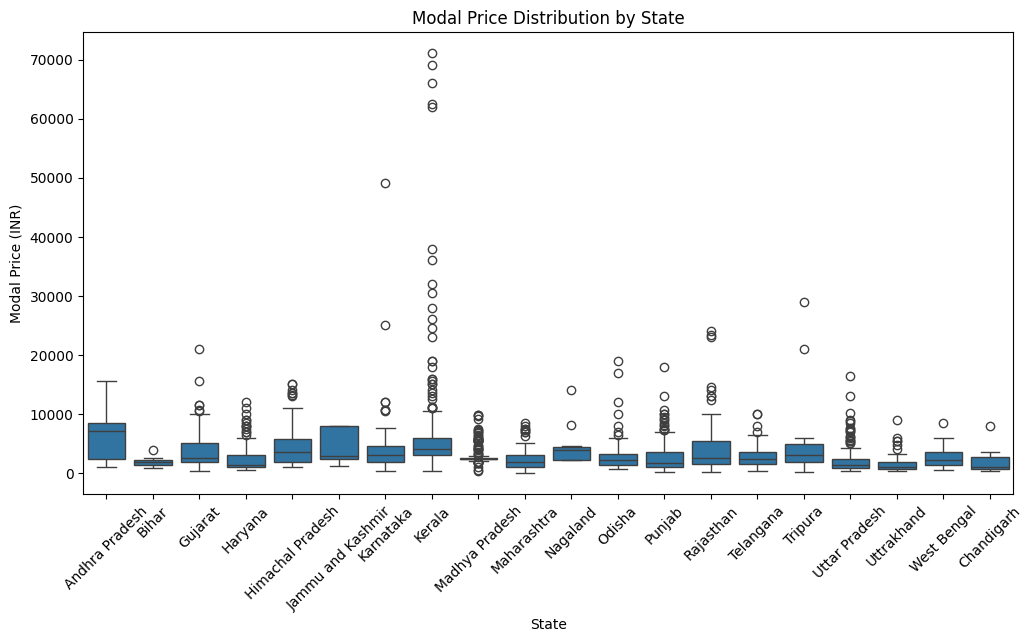

In [23]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Modal_x0020_Price', data=a)
plt.xticks(rotation=45)
plt.title("Modal Price Distribution by State")
plt.xlabel("State")
plt.ylabel("Modal Price (INR)")
plt.savefig("price_by_state.png")
plt.show()

# Visualization 3: Price range (min, max, modal) for top states

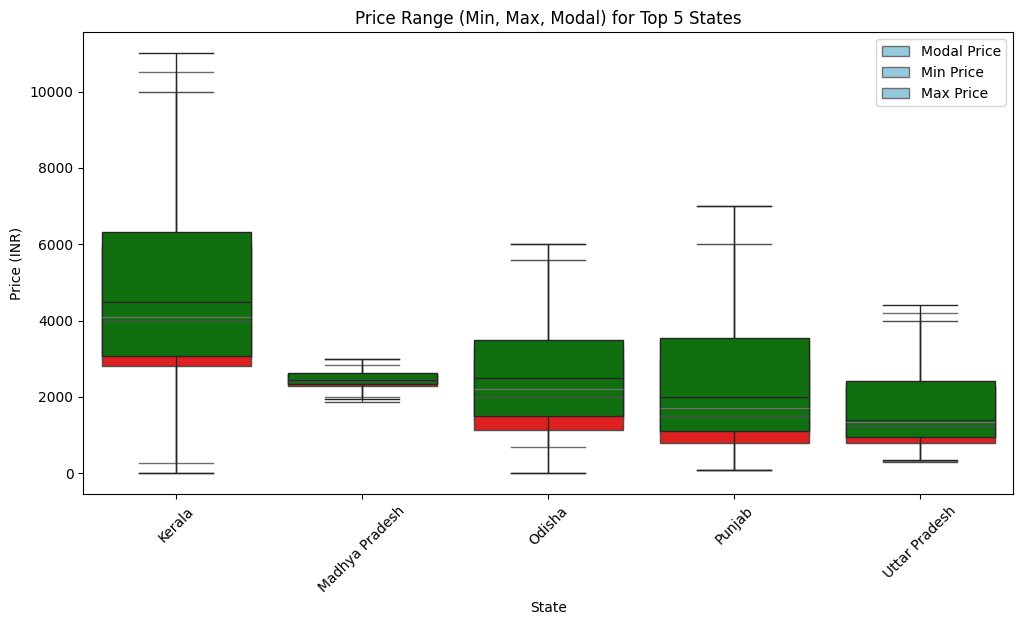

In [47]:
top_states = a['State'].value_counts().head(5).index
a_top_states = a[a['State'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Modal_x0020_Price', data=a_top_states, color='skyblue', showfliers=False)
sns.boxplot(x='State', y='Min_x0020_Price', data=a_top_states, color='red', showfliers=False)
sns.boxplot(x='State', y='Max_x0020_Price', data=a_top_states, color='green', showfliers=False)
plt.title("Price Range (Min, Max, Modal) for Top 5 States")
plt.xlabel("State")
plt.ylabel("Price (INR)")
plt.legend(['Modal Price', 'Min Price', 'Max Price'])
plt.xticks(rotation=45)
plt.savefig("price_range_top_states.png")
plt.show()

# Visualization 4: Commodity Distribution by State

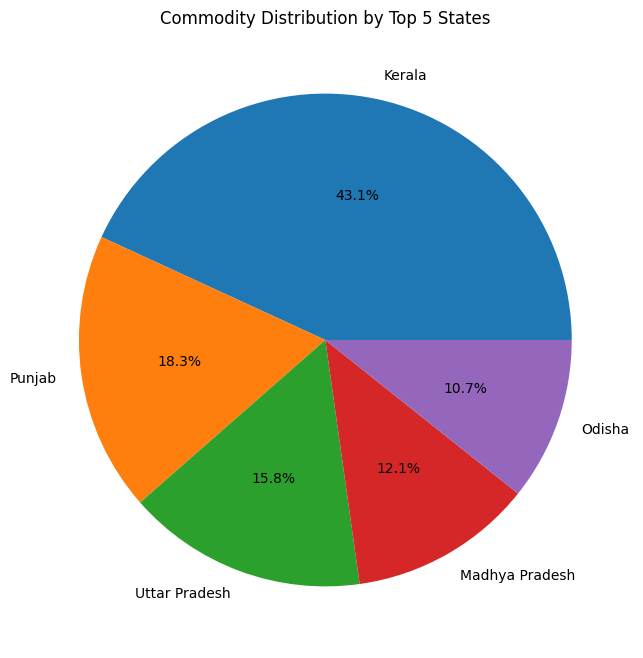

In [25]:
#Pie Chart
top_states = a['State'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%')
plt.title("Commodity Distribution by Top 5 States")
plt.savefig("commodity_by_state.png")
plt.show()

# Visualization 5: Min vs. Max Price by Commodity

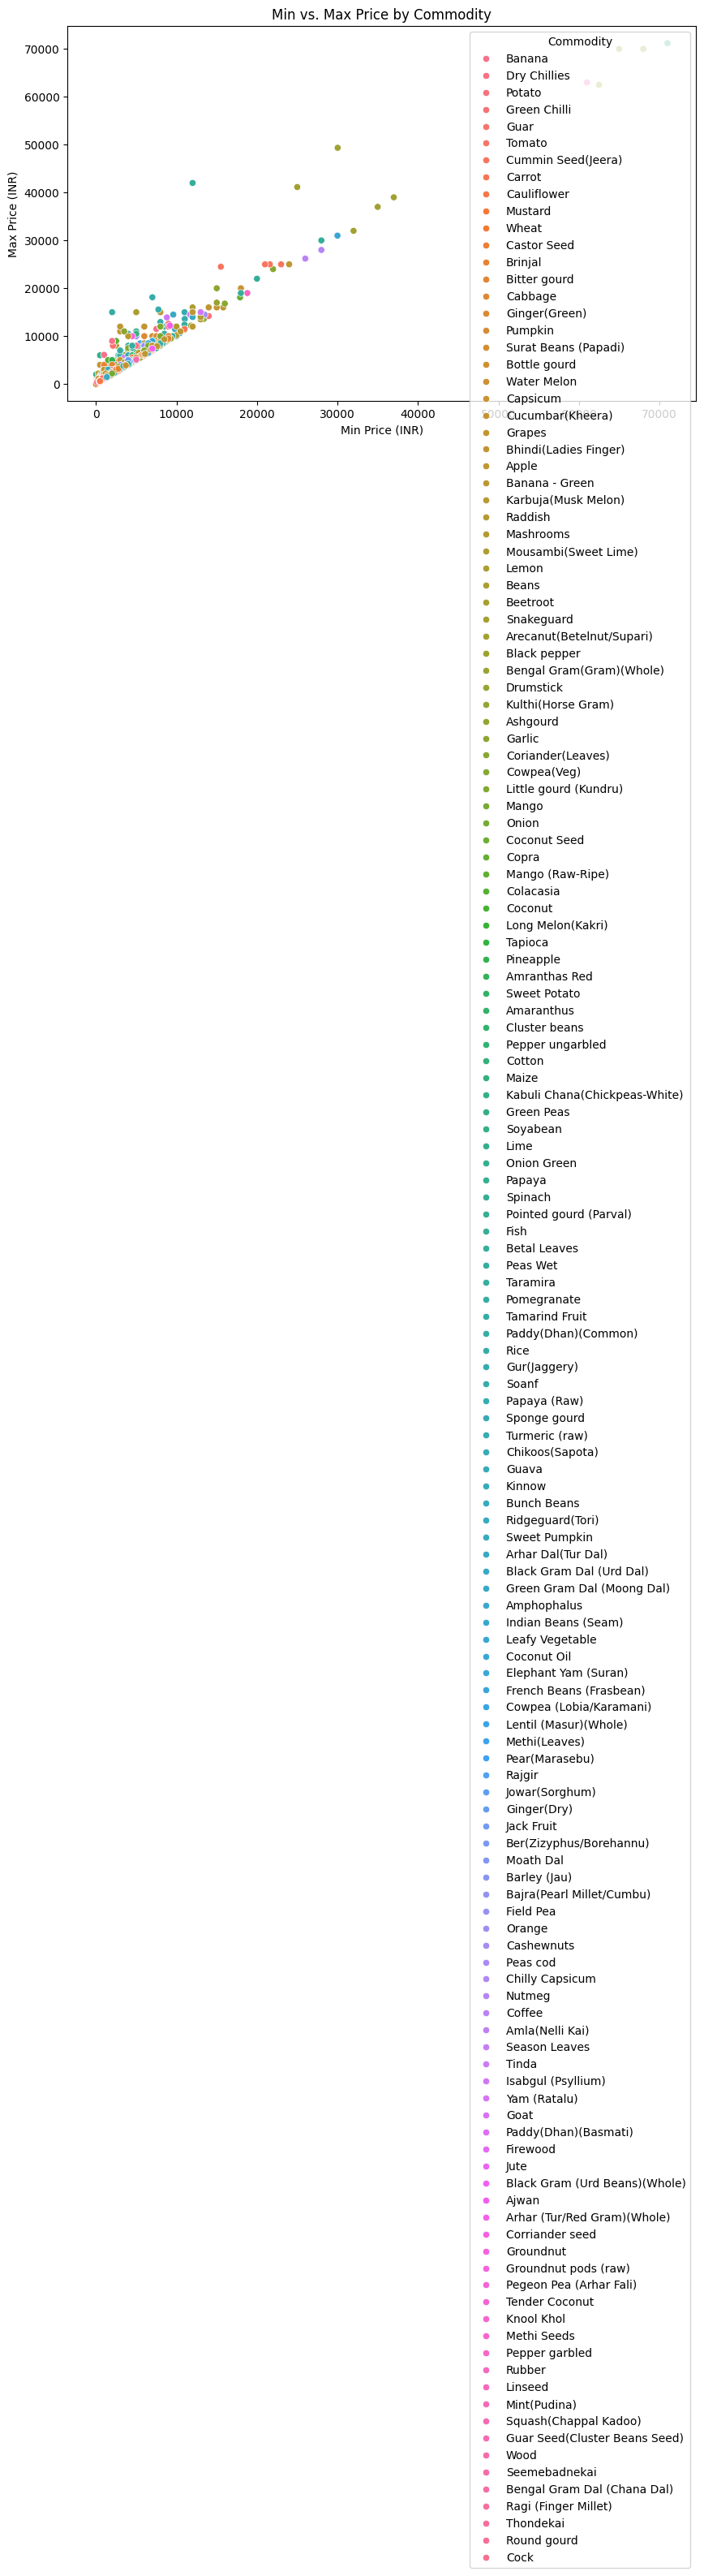

In [26]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min_x0020_Price', y='Max_x0020_Price', hue='Commodity', data=a)
plt.title("Min vs. Max Price by Commodity")
plt.xlabel("Min Price (INR)")
plt.ylabel("Max Price (INR)")
plt.savefig("min_vs_max_price.png")
plt.show()

# Visualization 6: Modal Price Distribution

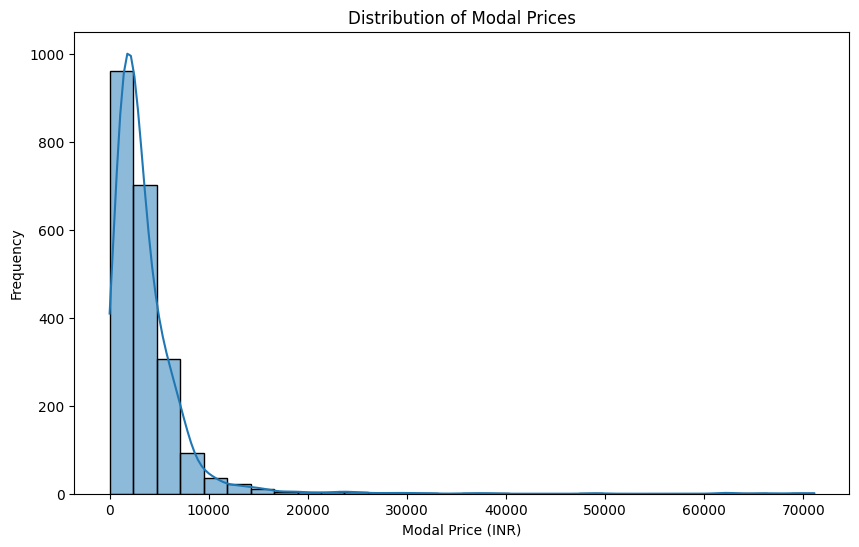

In [27]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(a['Modal_x0020_Price'], bins=30, kde=True)
plt.title("Distribution of Modal Prices")
plt.xlabel("Modal Price (INR)")
plt.ylabel("Frequency")
plt.savefig("modal_price_distribution.png")
plt.show()

# EDA And Statistical Analysis

# Step - 1 : EDA
#### Summary Statistics: Compute mean, median, std, min, max for price columns.

#### Commodity Analysis: Count unique commodities and their frequency.

#### Regional Analysis: Group by state/district to analyze price variations.

#### Correlation: Check correlations between min, max, and modal prices.

#### Top Markets: Identify markets with the highest number of commodities or highest average prices.

In [28]:
# Summary statistics
print(a[['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']].describe()) #describe is used to get summary stats

       Min_x0020_Price  Max_x0020_Price  Modal_x0020_Price
count      2159.000000      2159.000000        2159.000000
mean       3312.396943      3956.680408        3639.833719
std        4398.011914      4894.183683        4600.044685
min           0.000000         0.000000           3.000000
25%        1200.000000      1600.000000        1500.000000
50%        2400.000000      2600.000000        2500.000000
75%        4000.000000      5000.000000        4500.000000
max       71000.000000     71200.000000       71100.000000


In [29]:
# Unique commodities
print(f"Number of unique commodities: {a['Commodity'].nunique()}") #nunique is used to find no of unique values for each column 
print(a['Commodity'].value_counts().head(10))

Number of unique commodities: 148
Commodity
Wheat                    135
Tomato                   117
Potato                   112
Onion                    108
Brinjal                   95
Cucumbar(Kheera)          81
Cauliflower               73
Green Chilli              72
Banana                    71
Bhindi(Ladies Finger)     68
Name: count, dtype: int64


In [30]:
# Average modal price by state
state_avg_price = a.groupby('State')['Modal_x0020_Price'].mean().sort_values(ascending=False)
print(state_avg_price)

State
Andhra Pradesh       6479.230769
Kerala               5498.365385
Tripura              4904.166667
Nagaland             4760.000000
Himachal Pradesh     4740.666667
Karnataka            4686.890625
Jammu and Kashmir    4510.000000
Rajasthan            4234.734043
Gujarat              3773.954545
Madhya Pradesh       3052.250000
Telangana            2830.222222
Odisha               2779.436620
West Bengal          2600.140845
Punjab               2569.547325
Haryana              2529.440000
Maharashtra          2190.166667
Chandigarh           2063.636364
Uttar Pradesh        2048.578947
Bihar                1942.857143
Uttrakhand           1774.468085
Name: Modal_x0020_Price, dtype: float64


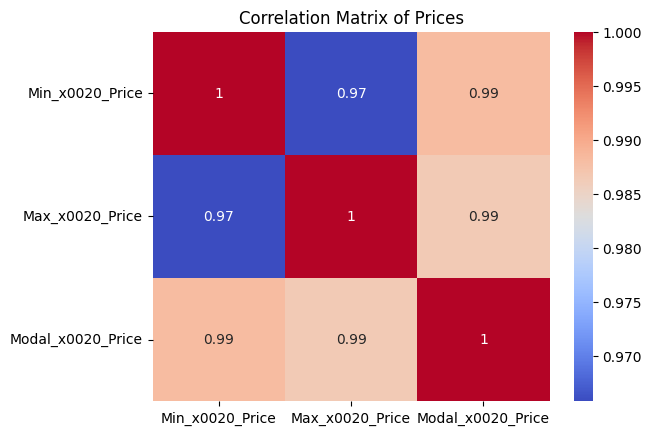

In [31]:
# Correlation matrix
corr_matrix = a[['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Prices')
plt.show()

In [32]:
top_markets = a.groupby('Market')['Modal_x0020_Price'].mean().sort_values(ascending=False).head(10)
print(top_markets)

Market
Madikeri               37014.500000
Jodhpur (Grain)        16240.000000
Chintapally            15500.000000
Kannur                 15350.000000
Payyannur              13575.000000
Dhanera                12786.250000
Pulpally               11709.166667
Pidugurala(Palnadu)    11500.000000
Ositan Mathania        10320.000000
Dumal                  10000.000000
Name: Modal_x0020_Price, dtype: float64


# Step - 2 : Statistical Analysis

#### Hypothesis Testing : Modal prices differ significantly between FAQ and Non-FAQ grades, Prices of vegetables .

#### ANOVA Test : Test if modal prices differ significantly across states.

#### Skewness and Kurtosis : Analyze the distribution of modal prices.

In [33]:
#Hypothesis Testing for Modal prices differ significantly between FAQ and Non-FAQ grades
faq_prices = a[a['Grade'] == 'FAQ']['Modal_x0020_Price']
non_faq_prices = a[a['Grade'] == 'Non-FAQ']['Modal_x0020_Price']
t_stat, p_value = ttest_ind(faq_prices, non_faq_prices)
print(f"T-test: t-stat={t_stat}, p-value={p_value}")

T-test: t-stat=3.334581484487352, p-value=0.0008718020362799802


In [34]:
#Hypothesis Testing for Prices of vegetables
vegetables = ['Tomato', 'Brinjal', 'Cauliflower', 'Cabbage']
fruits = ['Banana', 'Mango', 'Apple', 'Grapes']
veg_prices = a[a['Commodity'].isin(vegetables)]['Modal_x0020_Price']
fruit_prices = a[a['Commodity'].isin(fruits)]['Modal_x0020_Price']
t_stat, p_value = ttest_ind(veg_prices, fruit_prices)
print(f"T-test (Veg vs. Fruit): t-stat={t_stat}, p-value={p_value}")

T-test (Veg vs. Fruit): t-stat=-20.0050698002255, p-value=9.29411857015739e-65


In [35]:
#Anova Test
state_groups = [a[a['State'] == state]['Modal_x0020_Price'] for state in a['State'].unique()]
f_stat, p_value = f_oneway(*state_groups)
print(f"ANOVA: F-stat={f_stat}, p-value={p_value}")

ANOVA: F-stat=10.951423551341833, p-value=4.583693923159037e-32


In [36]:
#Skewness
print(f"Skewness: {skew(a['Modal_x0020_Price'])}")
print(f"Kurtosis: {kurtosis(a['Modal_x0020_Price'])}")

Skewness: 7.654323312047768
Kurtosis: 88.74875845697565


# Price Prediction Model : Using Linear Regression

In [37]:
# Encode categorical variables
df_encoded = pd.get_dummies(a, columns=['State', 'Commodity', 'Variety', 'Grade'])
X = df_encoded.drop(['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price', 'District', 'Market'], axis=1)
y = df_encoded['Modal_x0020_Price']

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1879.7397851695778


# Market Segmentation : Using K - Means

In [41]:
# Prepare data: average price and number of commodities per market
market_data = a.groupby('Market').agg({
    'Modal_x0020_Price': 'mean',
    'Commodity': 'nunique'
}).rename(columns={'Commodity': 'Commodity_Count'})

In [42]:
# Standardize features
scaler = StandardScaler()
market_scaled = scaler.fit_transform(market_data)

In [43]:
# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
market_data['Cluster'] = kmeans.fit_predict(market_scaled)

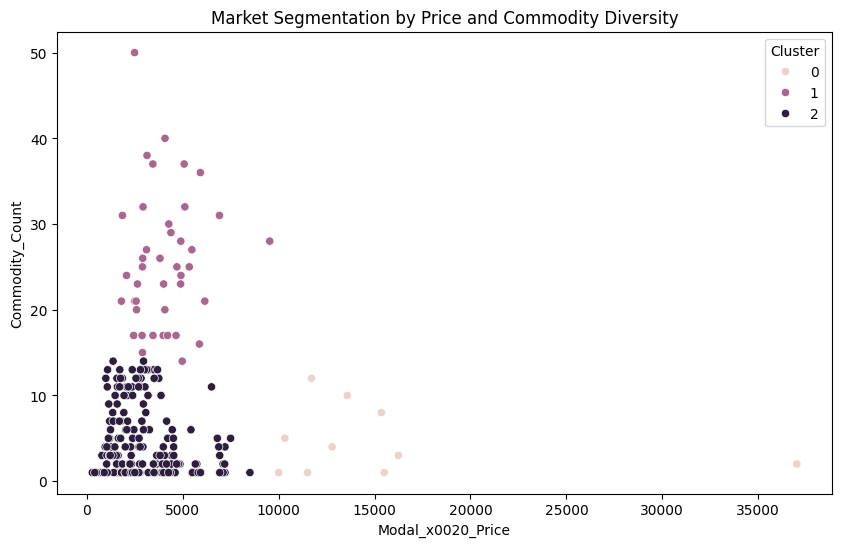

In [44]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Modal_x0020_Price', y='Commodity_Count', hue='Cluster', data=market_data)
plt.title("Market Segmentation by Price and Commodity Diversity")
plt.savefig("market_clusters.png")
plt.show()